In [1]:
from mne.io import read_raw_edf

# Load EEG data from EDF file
file_path = "eeg_file/01IS-1-ADP.edf"
raw = read_raw_edf(file_path, preload=True)

# Extract sampling rate and EEG signal
sampling_rate = int(raw.info['sfreq'])
eeg_signal = raw.get_data(picks="eeg")[2]  # Selecting the 3rd EEG channel (index 2)

Extracting EDF parameters from /media/artem/data/Dev/Sleep_analysis/01IS-1-ADP.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7529215  =      0.000 ... 29410.996 secs...


In [18]:

import pywt
import numpy as np

# Define the time vector
t = np.arange(len(eeg_signal)) / sampling_rate

# Define the scales for the wavelet transform
frequencies = np.logspace(0.00001, 2, 50)  # Logarithmic scale: ~1 Hz to 100 Hz
scales = pywt.scale2frequency('cmor1.5-1.0', frequencies) * sampling_rate

In [19]:

# Perform the continuous wavelet transform
coefficients, frequencies = pywt.cwt(eeg_signal, scales, 'cmor', sampling_period=1/sampling_rate)

/home/artem/venv/sleep/lib/python3.12/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


TypeError: Image data of dtype complex128 cannot be converted to float

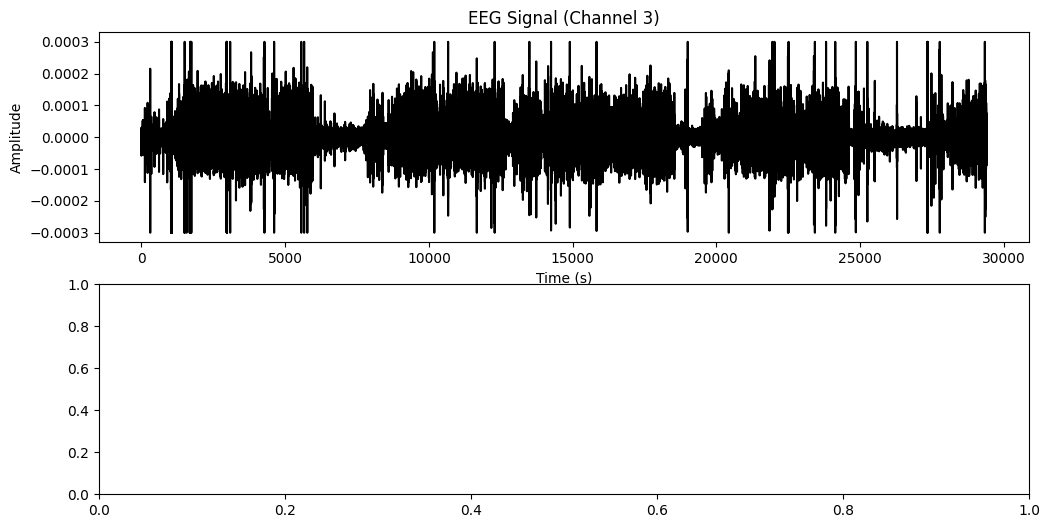

In [22]:
from matplotlib import pyplot as plt

# Plot the EEG signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, color='black')
plt.title("EEG Signal (Channel 3)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the scalogram with a log scale on the y-axis
plt.subplot(2, 1, 2)
plt.imshow(
    np.abs(coefficients), aspect='auto', cmap='jet', origin='lower'
)
plt.yscale('log')  # Set y-axis to logarithmic scale
# plt.colorbar(label="Amplitude")
plt.title("Wavelet Scalogram (Logarithmic Frequency Scale)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()